In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import cv2
from tqdm import tqdm

# 数据预处理

遍历文件夹中的图片并存储文件名为paths列表

In [2]:
file_path='desktop/cats_vs_dogs'
paths=glob.glob(os.path.join(file_path,'*.jpg'))
paths.sort()
paths[24999]

'desktop/cats_vs_dogs/dog.9999.jpg'

将一张图片size改为(50 , 50 , 3)

(50, 50, 3)


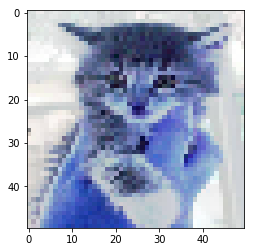

In [3]:
# 将一张图片size改为50*50*3
i=3
root = paths[i]
crop_size = (50,50)
image = cv2.imread(root)
img_new0 = cv2.resize(image, crop_size)
plt.imshow(img_new0)
print(img_new0.shape)

将25000张图片size改成 (50 , 50 , 3) 并存储在构造的变量矩阵中

In [4]:
i=0
train_image=np.empty((25000,50,50,3),dtype = int)
while i<25000:
    root = paths[i]
    crop_size = (50,50)
    img = cv2.imread(root)
    img = cv2.resize(img, crop_size)
    train_image[i,:,:,:]=img
    i=i+1
# np.save('desktop/train_image.npy',train_image) 占存储空间太大，这里就不存储了

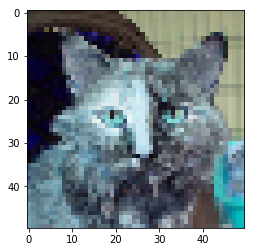

In [6]:
# 显示一张图效果
plt.imshow(train_image[2,:,:,:])

用subplot显示数据库中12张图裁剪完后的效果

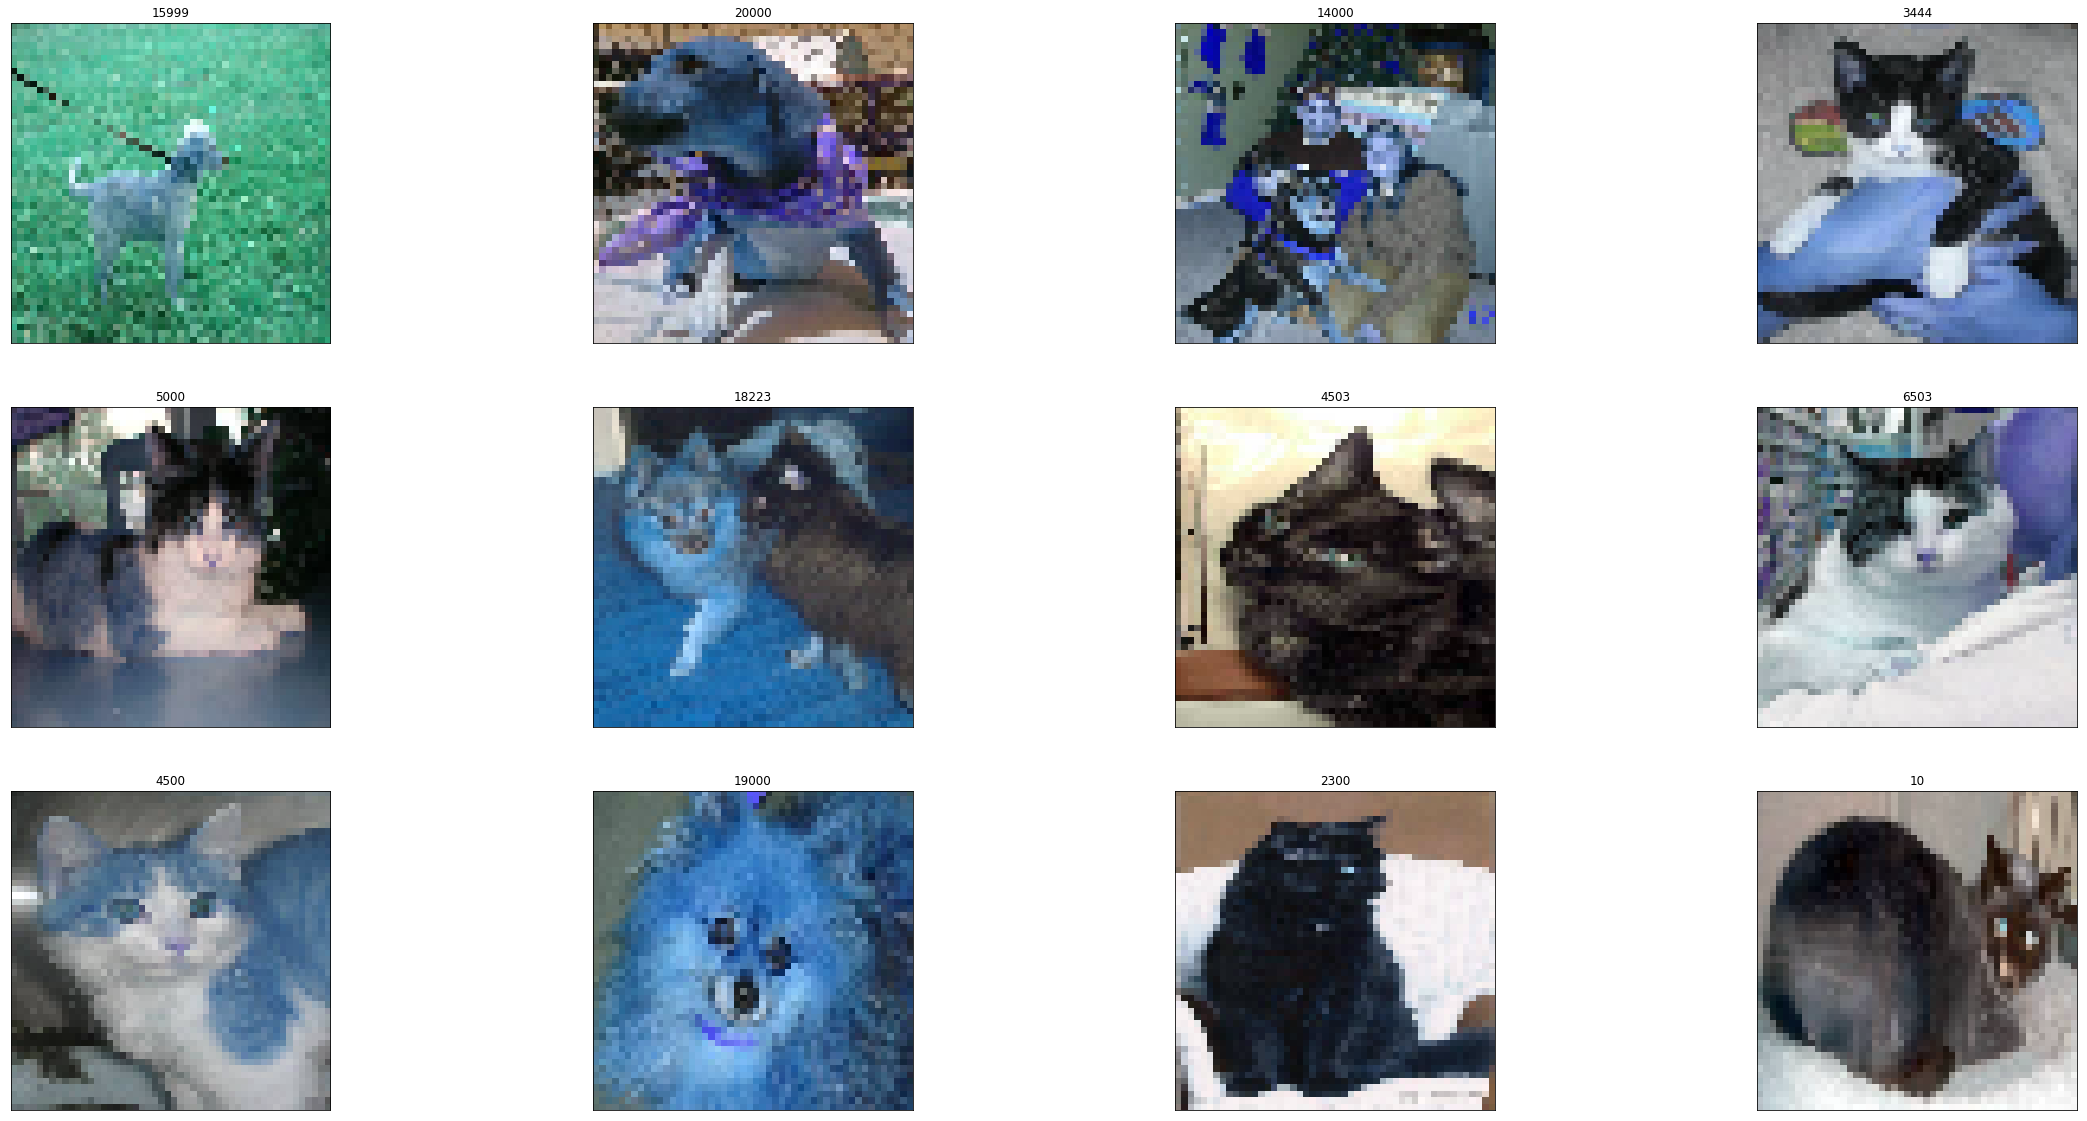

In [7]:
plot_idx=[15999,20000,14000,3444,5000,18223,4503,6503,4500,19000,2300,10]
fig, axes = plt.subplots(3, 4, figsize=(40, 20),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
i=0
for i, image, ax in zip(plot_idx, train_image[:,:,:,i] , axes.ravel()): 
    ax.imshow(train_image[i,:,:,:]) 
    ax.set_title("{}".format(i))

train_image 存储了25000张 50*50 的3通道照片

In [8]:
train_image.shape

(25000, 50, 50, 3)

用split函数分割文件名，根据文件名 cat / dog 来判断猫狗类别

In [9]:
i=24999
root=paths[i]
print(root)
image_name=root.split('/')[2]
print(image_name)
print(image_name.split('.')[0])

desktop/cats_vs_dogs/dog.9999.jpg
dog.9999.jpg
dog


给25000张训练图片标记，猫为1，狗为0

In [10]:
i=0
label_image=np.empty((25000,1),dtype = int)
while i<25000:
    root = paths[i]
    image_name=root.split('/')[2]
    word_label=image_name.split('.')[0]
    if word_label == 'cat':  label = 1
    elif word_label == 'dog':  label = 0
    label_image[i,:]=label
    i=i+1

In [11]:
label_image.shape

(25000, 1)

# 至此，成功把训练集图片统一尺寸并封装在一个四维矩阵以及自动标注猫狗类别

train_image  (25000,50,50,3) 存储了 X_train （图片）

label_image  (25000,1) 存储了 y_train （标签，猫为1，狗为0）

Text(0.5, 1.0, 'label [1]')

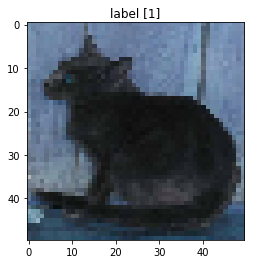

In [12]:
# 显示效果
i=20
plt.imshow(train_image[i,:,:,:])
plt.title("label {}".format(label_image[i]))

# 对训练集做同样的处理（裁剪图片，无法定义标签，因为原数据命名没有cat/dog）

若要对测试图数据进行分类标签需要人工标注

训练集尺寸为 (12500,50,50,3)

存储为test_image.npy

In [13]:
file_path='desktop/cats_vs_dogs_test_data'
paths=glob.glob(os.path.join(file_path,'*.jpg'))
paths.sort()
i=0
test_image=np.empty((12500,50,50,3),dtype = int)
while i<12500:
    root = paths[i]
    crop_size = (50,50)
    img = cv2.imread(root)
    img = cv2.resize(img, crop_size)
    test_image[i,:,:,:]=img
    i=i+1

# 检查三个文件的格式并且保存成.npy文件到本地

In [14]:
print(test_image.shape)
print(label_image.shape)
print(train_image.shape)

(12500, 50, 50, 3)
(25000, 1)
(25000, 50, 50, 3)


In [17]:
np.save('desktop/test_image.npy',test_image)

In [15]:
np.save('desktop/label_image.npy',label_image)

In [16]:
np.save('desktop/train_image.npy',train_image)

# 构建深度学习模型 （详情见cats_vs_dogs_CNN.ipynb）

输出训练集和测试集的矩阵变量，用colab跑深度学习

跑完深度学习后的预测值与图片对照

# 在colab上跑完深度学习后本地裁剪1000张test图片为200*200 （效果比较清楚）

In [3]:
file_path='desktop/cats_vs_dogs_test_data'
paths=glob.glob(os.path.join(file_path,'*.jpg'))
paths.sort()
i=0
test_image=np.empty((1000,200,200,3),dtype = int)
while i<1000:
    root = paths[i]
    crop_size = (200,200)
    img = cv2.imread(root)
    img = cv2.resize(img, crop_size)
    test_image[i,:,:,:]=img
    i=i+1

In [4]:
predictions=np.load('desktop/cats_vs_dogs_data/predictions.npy')

In [5]:
predictions.shape

(12500,)

在200*200尺寸的照片上看预测效果

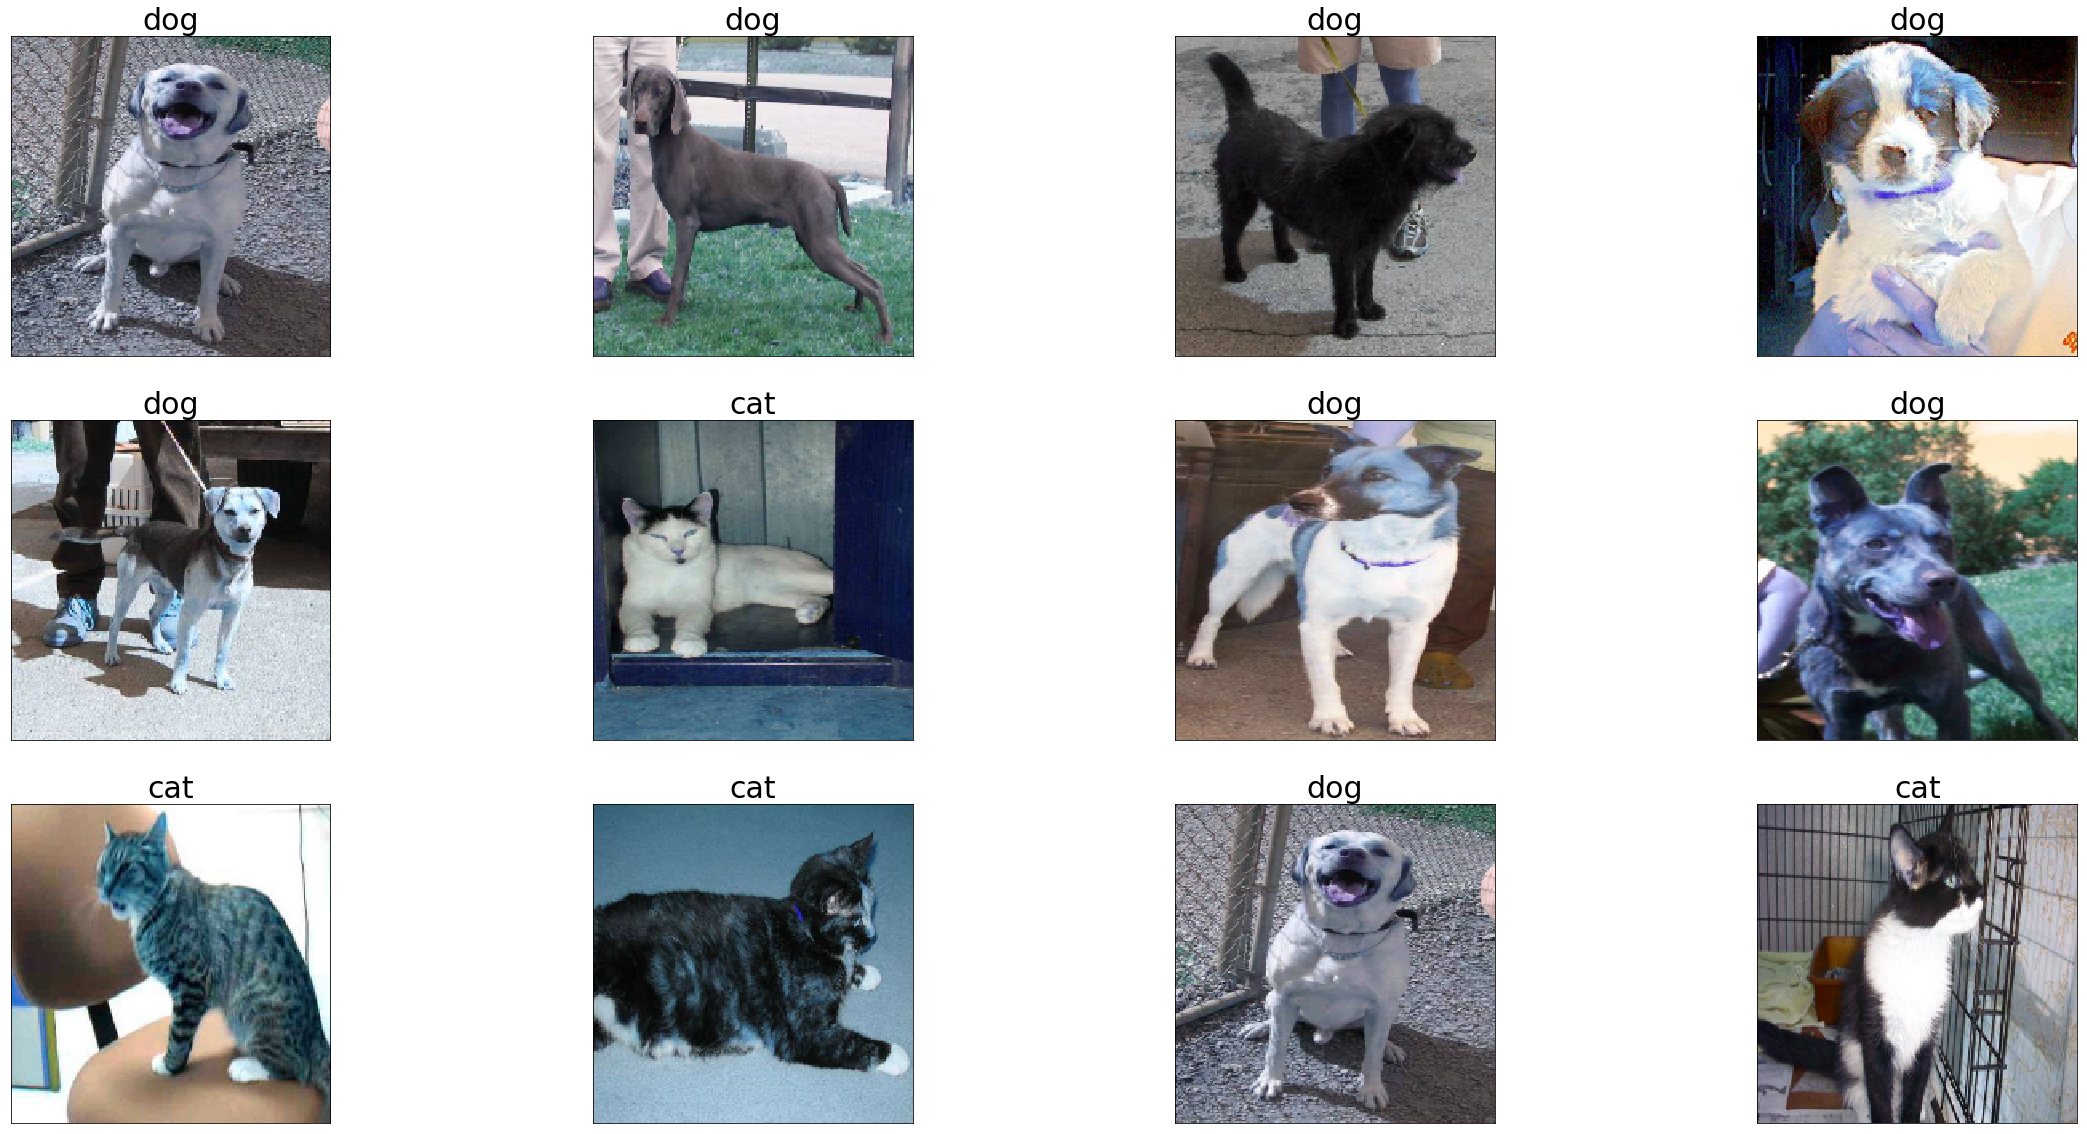

In [10]:
# 显示测试集数据库中12张照片
# 正确率大概在80%左右
plot_idx=[111,212,31,41,51,61,70,80,91,101,111,121]
fig, axes = plt.subplots(3, 4, figsize=(40, 20),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
i=0
for i, image, ax in zip(plot_idx, test_image[i,:,:,:], axes.ravel()): 
    ax.imshow(test_image[i,:,:,:]) 
    if predictions[i] == 1:  label='cat'
    elif predictions[i] == 0:  label='dog'
    ax.set_title("{}".format(label),fontsize=30)